# Lab 2: Data Preparation

## Name: David Ryan
## Student ID: 0867284

## A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [2]:
def series_to_percentages(series):
    return series.value_counts().transform(lambda x: round((x / series.count()) * 100, 2))

def print_missing_values():
    print(df[df.columns[df.isnull().any()].tolist()].isna().sum())

Check for missing values.

In [3]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [4]:
# Make a copy of original data
df_original = df.copy(deep=True)

## B. Process and Encode the Categorical Features

In [5]:
df.select_dtypes(exclude=["number","bool_"])

job   marital  education default housing loan    contact month  \
0       technician    single   tertiary      no     yes   no   cellular   apr   
1       technician  divorced  secondary      no     yes  yes   cellular   apr   
2          retired   married  secondary      no     yes  yes   cellular   apr   
3      blue-collar   married  secondary      no     yes  yes   cellular   apr   
4          retired   married  secondary      no     yes   no   cellular   apr   
...            ...       ...        ...     ...     ...  ...        ...   ...   
1995       student    single        NaN      no      no   no   cellular   sep   
1996        admin.    single  secondary      no      no   no   cellular   sep   
1997       retired   married    primary      no      no   no  telephone   sep   
1998      services   married    primary      no     yes   no        NaN   sep   
1999  entrepreneur   married  secondary      no      no   no   cellular   sep   

     poutcome subscribed  
0     failure         no  
1     failure         no  
2     failure         no  
3     failure         no  
4     failure         no  
...       ...        ...  
1995      NaN        yes  
1996      NaN        yes  
1997      NaN        yes  
1998      NaN        yes  
1999      NaN        yes  

[2000 rows x 10 columns]

## Encode Ordinal Categorical Attributes

We have only 2 ordinal categorical columns: `education` and `month`.

## Education

In [6]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [7]:
education_scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(education_scale_mapper)
df['education'].value_counts()

1.0    995
2.0    684
0.0    217
Name: education, dtype: int64

### Month

In [8]:
df['month'].value_counts()

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

In [9]:
df['month'].isna().sum()

0

In [10]:
month_scale_mapper = {
    "jan": 0,
    "feb": 1,
    "mar": 2,
    "apr": 3,
    "may": 4,
    "jun": 5,
    "jul": 6,
    "aug": 7,
    "sep": 8,
    "oct": 9,
    "nov": 10,
    "dec": 11
}

df['month'] = df['month'].replace(month_scale_mapper)
df['month'].value_counts()

1     404
4     333
0     245
3     205
6     167
7     136
8     134
5     104
9      93
2      70
10     68
11     41
Name: month, dtype: int64

In [11]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single        1.0      no      127      no   no   
1997  81.0       retired  married        0.0      no     1154      no   no   
1998  46.0      services  married        0.0      no     4343     yes   no   
1999  40.0  entrepreneur  married        1.0      no     6403      no   no   

        contact  day  month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16      8       327         2     -1         0      NaN   
1996   cellular   16      8      1334         2     -1         0      NaN   
1997  telephone   17      8       231         1     -1         0      NaN   
1998        NaN   20      8       185         1     -1         0      NaN   
1999   cellular   22      8       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### One-Hot Encode All Other Categorical Attributes

In [12]:
cat_attributes = df.select_dtypes(exclude=["number","bool_"])
columns_with_nans = cat_attributes.columns[cat_attributes.isnull().any()].tolist()

In [13]:
# first one-hot encode the categorical columns with NaNs
df = pd.get_dummies(df, columns=columns_with_nans, 
                        dummy_na=True, 
                        drop_first=False)
df.columns.tolist()

['age',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'subscribed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_nan',
 'contact_cellular',
 'contact_telephone',
 'contact_nan',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_nan']

### One-Hot Encode All Other Categorical Attributes

In [14]:
df = pd.get_dummies(df, drop_first=False)
df.columns.tolist()

['age',
 'education',
 'balance',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_nan',
 'contact_cellular',
 'contact_telephone',
 'contact_nan',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_nan',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'subscribed_no',
 'subscribed_yes']

## C. Treatment of Missing Values in Numerical Columns

In [15]:
print_missing_values()

age           12
education    104
dtype: int64


### Education Missing Values

There are 104 missing values in `education`. We have 2 choices, consider missing values synonymous with 'no education', or fill in another valid value. This dataset comes from a Portugeuse banking institution. According to [Wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate), Portugal has a literacy rate of 99.4%, so it's hard to believe that ~5% of the dataset is illiterate (assuming basic literacy is equivalent to a primary education).

Perhaps if we look at what kind of job is associated with these missing education values, we might have a clue as to which education level would be most appropriate to fill in.

In [16]:
series_to_percentages(df['education'])

1.0    52.48
2.0    36.08
0.0    11.45
Name: education, dtype: float64

In [17]:
df.filter(like="job_", axis=1).sum()

job_admin.           247
job_blue-collar      298
job_entrepreneur      45
job_housemaid         35
job_management       461
job_retired          162
job_self-employed     64
job_services         165
job_student           96
job_technician       348
job_unemployed        69
job_nan               10
dtype: int64

In [18]:
# Cross tab against the original 'job' column
crosstab_EJ = pd.crosstab(df['education'], df_original['job'].fillna("nan"))

In [19]:
# See which education level mostly corresponds with each job
crosstab_EJ.idxmax()

job
admin.           1.0
blue-collar      1.0
entrepreneur     2.0
housemaid        0.0
management       2.0
nan              0.0
retired          1.0
self-employed    2.0
services         1.0
student          1.0
technician       1.0
unemployed       1.0
dtype: float64

In [20]:
# Replace missing `education` values with the most common education level
# for the job they have
def get_element(x):
    job = x.filter(like="job_").loc[lambda x: x == 1].index[0]
    return crosstab_EJ.idxmax()[job.removeprefix("job_")]

# Replace missing values
df['education'].fillna(df[df['education'].isnull()].apply(get_element, axis=1), inplace=True)

In [21]:
df['education'].value_counts()

1.0    1068
2.0     710
0.0     222
Name: education, dtype: int64

In [22]:
print_missing_values()

age    12
dtype: int64


In [23]:
df['age'].fillna(df['age'].median(), inplace=True)

In [24]:
print_missing_values()

Series([], dtype: float64)


## D. Rescaling Features

In [25]:
df.describe()

age    education       balance          day        month  \
count  2000.00000  2000.000000   2000.000000  2000.000000  2000.000000   
mean     41.73050     1.244000   1413.663500    13.851500     4.002500   
std      12.68942     0.637705   3131.224213     9.712189     3.079974   
min      18.00000     0.000000   -980.000000     1.000000     0.000000   
25%      32.00000     1.000000    201.500000     5.000000     1.000000   
50%      38.00000     1.000000    551.000000    12.000000     4.000000   
75%      50.00000     2.000000   1644.500000    23.000000     6.000000   
max      93.00000     2.000000  81204.000000    31.000000    11.000000   

          duration     campaign        pdays     previous   job_admin.  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean    292.020500     1.909500   167.896000     2.561500     0.123500  ...   
std     221.557295     1.378862   131.754126     3.400735     0.329093  ...   
min       7.000000     1.000000    -1.000000     0.000000     0.000000  ...   
25%     146.000000     1.000000    75.750000     1.000000     0.000000  ...   
50%     236.000000     1.000000   182.000000     2.000000     0.000000  ...   
75%     379.000000     2.000000   251.000000     3.000000     0.000000  ...   
max    1823.000000    11.000000   854.000000    55.000000     1.000000  ...   

       marital_married  marital_single   default_no  default_yes   housing_no  \
count      2000.000000     2000.000000  2000.000000  2000.000000  2000.000000   
mean          0.555500        0.337000     0.992500     0.007500     0.518500   
std           0.497034        0.472803     0.086299     0.086299     0.499783   
min           0.000000        0.000000     0.000000     0.000000     0.000000   
25%           0.000000        0.000000     1.000000     0.000000     0.000000   
50%           1.000000        0.000000     1.000000     0.000000     1.000000   
75%           1.000000        1.000000     1.000000     0.000000     1.000000   
max           1.000000        1.000000     1.000000     1.000000     1.000000   

       housing_yes      loan_no     loan_yes  subscribed_no  subscribed_yes  
count  2000.000000  2000.000000  2000.000000    2000.000000     2000.000000  
mean      0.481500     0.875000     0.125000       0.500000        0.500000  
std       0.499783     0.330802     0.330802       0.500125        0.500125  
min       0.000000     0.000000     0.000000       0.000000        0.000000  
25%       0.000000     1.000000     0.000000       0.000000        0.000000  
50%       0.000000     1.000000     0.000000       0.500000        0.500000  
75%       1.000000     1.000000     0.000000       1.000000        1.000000  
max       1.000000     1.000000     1.000000       1.000000        1.000000  

[8 rows x 39 columns]

In [26]:
ordinal_attributes = df[['education', 'day', 'month']]
ordinal_attributes.describe()

education          day        month
count  2000.000000  2000.000000  2000.000000
mean      1.244000    13.851500     4.002500
std       0.637705     9.712189     3.079974
min       0.000000     1.000000     0.000000
25%       1.000000     5.000000     1.000000
50%       1.000000    12.000000     4.000000
75%       2.000000    23.000000     6.000000
max       2.000000    31.000000    11.000000

In [27]:
ordinal_attributes = ordinal_attributes / ordinal_attributes.max()
ordinal_attributes.describe()

education          day        month
count  2000.000000  2000.000000  2000.000000
mean      0.622000     0.446823     0.363864
std       0.318852     0.313296     0.279998
min       0.000000     0.032258     0.000000
25%       0.500000     0.161290     0.090909
50%       0.500000     0.387097     0.363636
75%       1.000000     0.741935     0.545455
max       1.000000     1.000000     1.000000

In [28]:
robust_scaler = RobustScaler()
numerical_attributes = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_attributes] = robust_scaler.fit_transform(
    df[numerical_attributes]
)
df[numerical_attributes].describe()

age      balance     duration     campaign        pdays  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.207250     0.597826     0.240431     0.909500    -0.080479   
std       0.704968     2.169941     0.950890     1.378862     0.751807   
min      -1.111111    -1.060984    -0.982833     0.000000    -1.044223   
25%      -0.333333    -0.242204    -0.386266     0.000000    -0.606277   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.666667     0.757796     0.613734     1.000000     0.393723   
max       3.055556    55.892585     6.811159    10.000000     3.834522   

          previous  
count  2000.000000  
mean      0.280750  
std       1.700368  
min      -1.000000  
25%      -0.500000  
50%       0.000000  
75%       0.500000  
max      26.500000

## E. Treatment of Outliers

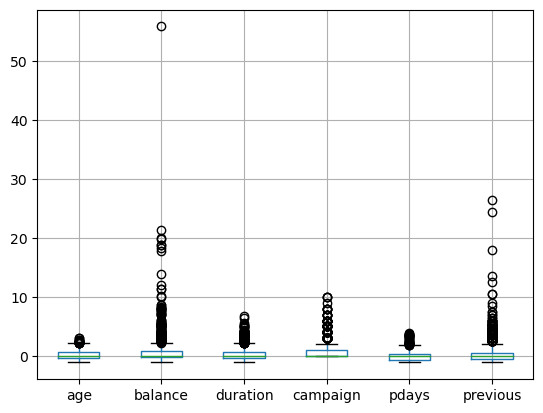

In [29]:
df.boxplot(column=numerical_attributes)
plt.show()

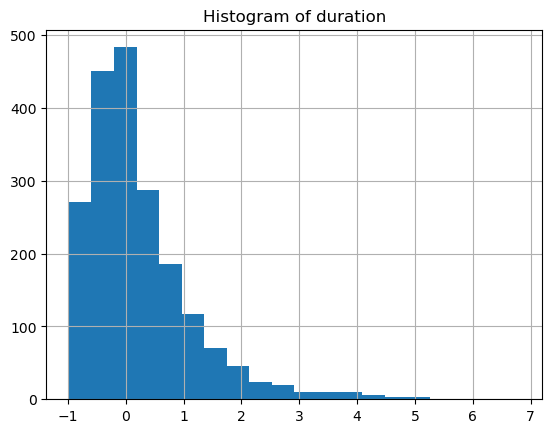

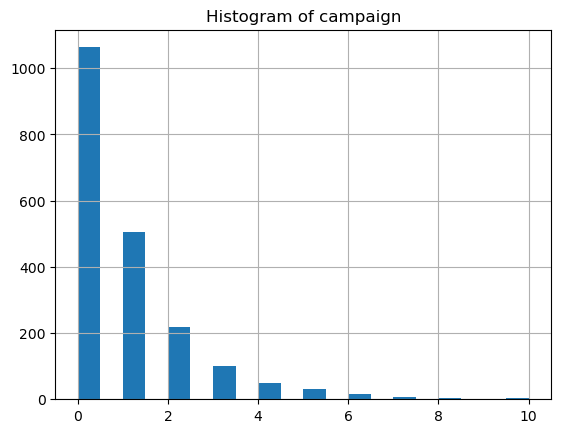

In [30]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

for i, col in enumerate(numerical_attributes):
    df[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()
    

In [31]:
df[numerical_attributes].min()

age        -1.111111
balance    -1.060984
duration   -0.982833
campaign    0.000000
pdays      -1.044223
previous   -1.000000
dtype: float64

In [32]:
negative_attributes = [name for name, data in df.iteritems() if data.min() < 0]
df[negative_attributes].min()

age        -1.111111
balance    -1.060984
duration   -0.982833
pdays      -1.044223
previous   -1.000000
dtype: float64

In [33]:
df[negative_attributes] = np.log(df[negative_attributes] + np.abs(df[negative_attributes].min()) + 1)
df[negative_attributes].min()

age         0.0
balance     0.0
duration    0.0
pdays       0.0
previous    0.0
dtype: float64

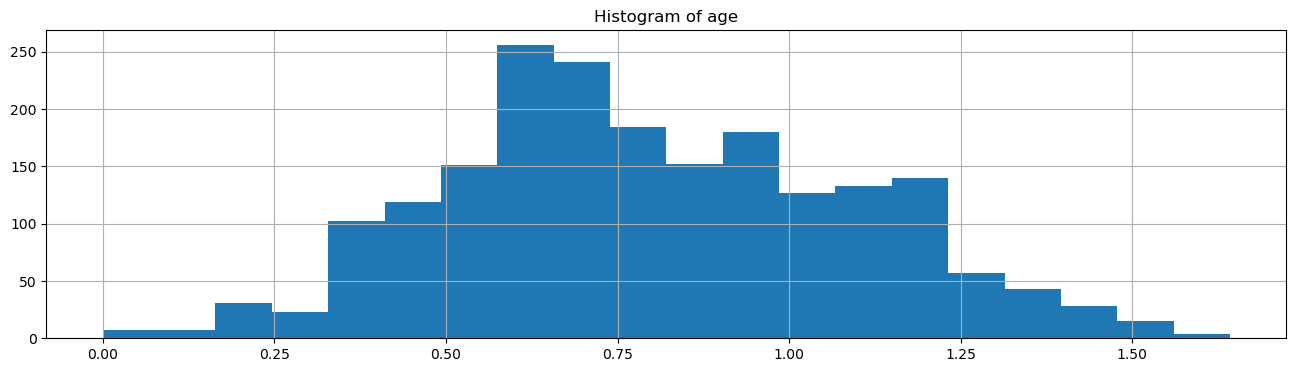

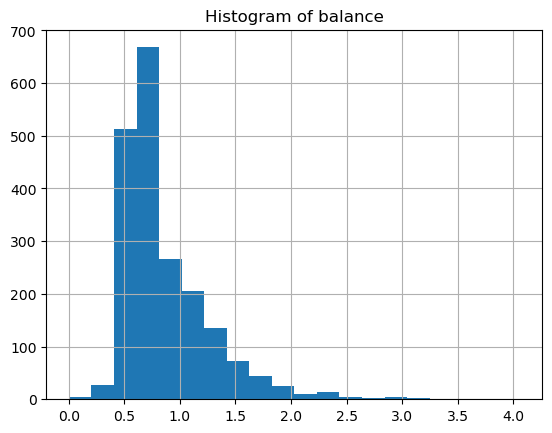

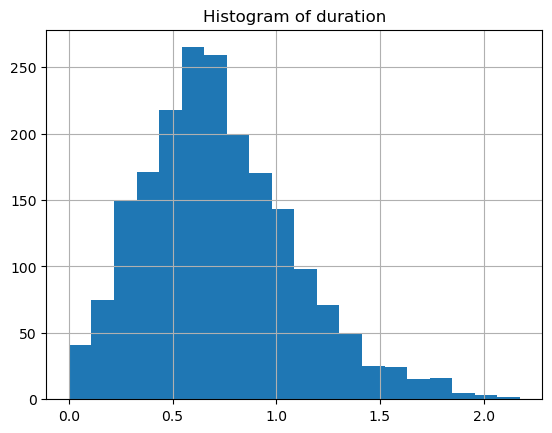

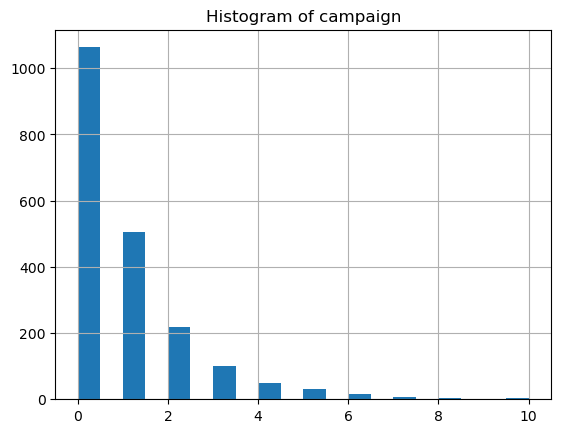

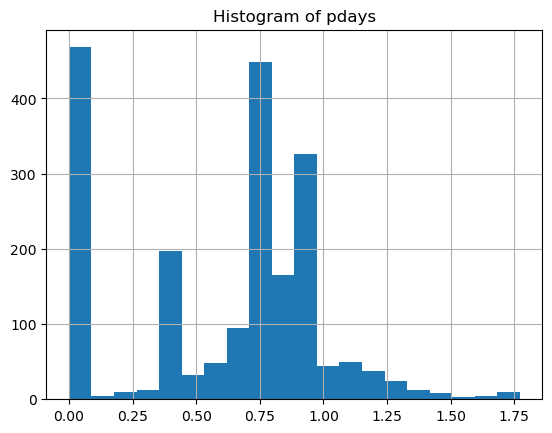

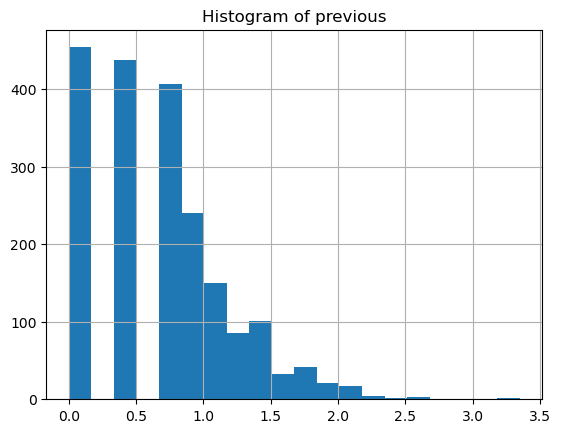

In [34]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

for i, col in enumerate(numerical_attributes):
    df[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()
    

## F. Creation of Derived Features

It seems more than 50% of the values for `campaign` are 0. If this was a missing value, we would probably drop the column. Though this isn't a missing value and simply means that this was the first time the customer was contacted during the current campaign. Perhaps we can create a new column, `total_engagements`, which tracks the total number of previous contacts with the customer (`campaign` + `previous`). We can then drop `campaign` as it can be derived from `previous` and `total_engagements`.

In [35]:
df['total_engagements'] = df_original['previous'] + df_original['campaign']

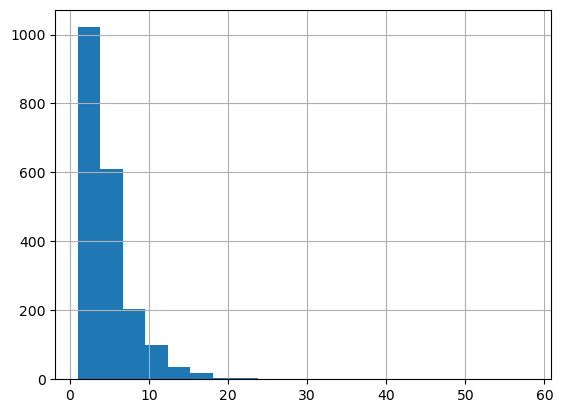

In [36]:
df['total_engagements'].hist(bins=20)
plt.show()

The new column is still very left leaning, maybe we should try a different transform. I'll work with the original data so the new transformations aren't affected by the previous ones.

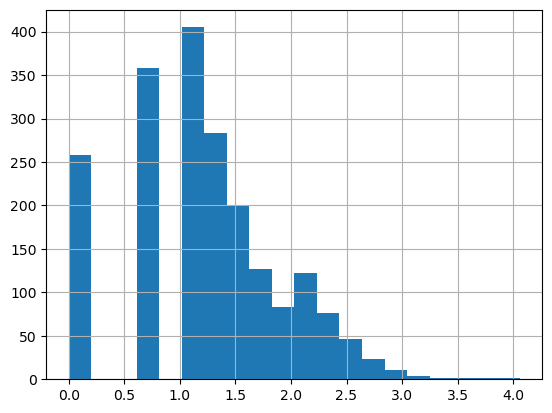

In [39]:
from scipy.stats import boxcox
df['total_engagements'] = boxcox(df['total_engagements'], 0.0)
df['total_engagements'].hist(bins=20)
plt.show()

`pdays` is still very skewed. However, this may be fine. The `-1` values correspond to the `poutcome_nan` column and the non-negative values only has meaning when `poutcome_nan` is false.

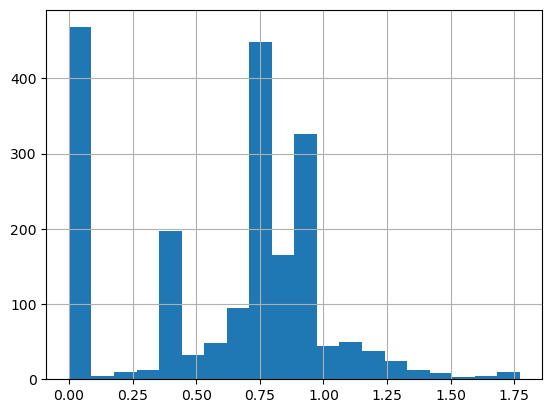

In [41]:
df['pdays'].hist(bins=20)
plt.show()

# G. Save the Prepared Dataset

Finally, let's save the prepared dataset as a CSV file.

In [43]:
df.to_csv('bank_train_prepared.csv')